# Wage Loss by Industry and County from Hurricane Harvey


## Table of Contents
- [Problem Statement](#Problem-Statement)
- [Import Packages](#Import-Packages)
- [Primary EDA](#Primary-EDA)
- [Secondary EDA](#Secondary-EDA)
- [Missing Data](#Missing-Data)
- [Splitting Dataframes by Industry](#Splitting-Dataframes-by-Industry)
- [Next Steps](#Next-Steps)



### Problem Statement 
Natural disasters are becoming more economically devastating to the areas that they impact. Given data from job sites such as Indeed and Glassdoor, is it possible to build a predictive model to estimate the economic losses for an area affected by a natural disaster? 

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Primary EDA

In [2]:
# read in csv file for q2 and save as dataframe
q2_df = pd.read_csv('./data/BLS_Data_Q2_17/q2_df.csv')

# examine q2_df 
q2_df.head()

#check shape of q2_df
q2_df.shape

# drop extra index column 'Unnamed: 0'
q2_df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
# read in q3 csv data and save as dataframe
q3_df = pd.read_csv('./data/BLS_Data_Q3_17/q3_df.csv')

#check shape of q3_df
q3_df.shape

(2724, 10)

In [4]:
#drop the extra index column "Unnamed: 0"
q3_df = q3_df.drop(columns=['Unnamed: 0'])

#import and save q4 data as a dataframe
q4_df = pd.read_csv('./data/BLS_Data_Q4_17/q4_df.csv')

#examine q4 dataframe
q4_df.head()

,Unnamed: 0,Unnamed: 0.1,Area Name,Quarter,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),Industry,FIPS
0,0,0,Anderson County,Fourth Quarter,106.0,607.0,-12.8,939.0,27.2,Construction,48001.0
1,1,1,Andrews County,Fourth Quarter,37.0,821.0,9.8,1575.0,12.7,Construction,48003.0
2,2,2,Angelina County,Fourth Quarter,147.0,1369.0,-8.7,856.0,6.3,Construction,48005.0
3,3,3,Aransas County,Fourth Quarter,67.0,369.0,-3.1,979.0,-5.9,Construction,48007.0
4,4,4,Archer County,Fourth Quarter,36.0,119.0,0.8,670.0,2.6,Construction,48009.0


In [5]:
#remove the two extra index columns for q4_df
q4_df = q4_df.drop(columns= ['Unnamed: 0', 'Unnamed: 0.1'])

#verify the columns dropped succesfully
q4_df.head()

,Area Name,Quarter,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),Industry,FIPS
0,Anderson County,Fourth Quarter,106.0,607.0,-12.8,939.0,27.2,Construction,48001.0
1,Andrews County,Fourth Quarter,37.0,821.0,9.8,1575.0,12.7,Construction,48003.0
2,Angelina County,Fourth Quarter,147.0,1369.0,-8.7,856.0,6.3,Construction,48005.0
3,Aransas County,Fourth Quarter,67.0,369.0,-3.1,979.0,-5.9,Construction,48007.0
4,Archer County,Fourth Quarter,36.0,119.0,0.8,670.0,2.6,Construction,48009.0


In [6]:
#check shape of q4_df
q4_df.shape

(2725, 9)

In [7]:
#create list of all 3 df
df_list = [q2_df, q3_df, q4_df]

#combine imported info into 1 dataframe
q2_q3_q4 = pd.concat([q2_df, q3_df, q4_df])

#check shape of q2_df_q3_df_q4_df
q2_q3_q4.shape

(8154, 9)

In [8]:
#save to q2_q3_q4.csv
q2_q3_q4.to_csv('./data/q2_q3_q4.csv')

In [9]:
# Load the data.
df = pd.read_csv('./data/q2_q3_q4.csv')

In [10]:
# Check the df dataframe.
df.head()

,Unnamed: 0,Area Name,Quarter,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),Industry,FIPS
0,0,Anderson County,Second Quarter,109.0,1666.0,3.1,275.0,1.1,Leisure and Hospitality,48001.0
1,1,Andrews County,Second Quarter,37.0,531.0,17.5,439.0,-0.9,Leisure and Hospitality,48003.0
2,2,Angelina County,Second Quarter,157.0,3549.0,7.6,302.0,-0.3,Leisure and Hospitality,48005.0
3,3,Aransas County,Second Quarter,124.0,1660.0,6.8,335.0,-0.9,Leisure and Hospitality,48007.0
4,4,Archer County,Second Quarter,8.0,60.0,50.0,222.0,-21.3,Leisure and Hospitality,48009.0


In [11]:
# Check the shape of data frame.
df.shape

(8154, 10)

In [12]:
# Check the std & mean & min & max of the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8154.0,1358.515575,784.694015,0.0,679.00,1358.5,2038.00,2724.0
No Of Establishments,8126.0,233.172656,1174.494175,1.0,9.00,29.0,87.75,25099.0
Employment,7186.0,4151.521709,22583.140257,0.0,76.25,312.5,1202.75,485145.0
One-Year Employment Gain/Loss (Percent),6827.0,11.140179,72.803183,-100.0,-4.20,1.7,9.40,2200.0
Average Weekly Wages,7186.0,794.169775,378.104028,0.0,551.00,759.0,979.00,4316.0
On-Year Weekly Wages Gain/Loss (Percent),6834.0,5.774422,40.117113,-100.0,-2.50,2.8,9.00,2421.4
FIPS,8126.0,48253.364509,146.771133,48001.0,48127.00,48251.0,48381.00,48507.0


In [13]:
# Check the column's name.
df.columns

Index(['Unnamed: 0', 'Area Name', 'Quarter', 'No Of Establishments',
       'Employment', 'One-Year Employment Gain/Loss (Percent)',
       'Average Weekly Wages', 'On-Year Weekly Wages Gain/Loss (Percent)',
       'Industry', 'FIPS'],
      dtype='object')

In [14]:
# Drop the 'Unnamed: 0' column.
df = df.drop(columns = 'Unnamed: 0')

## Secondary EDA

After looking at the data, we wanted to know which counties is directly affected by hurricane. In the FEMA disaster website, we found the Designated Counties of individe Assistance which are the counties that received aid from the government, so we used those as the subset of counties that the hurricane hit. 

In [15]:
# Create a list with all the direct affect county.
direct_affect = ['Aransas County', 'Austin County', 'Bastrop County',
                 'Bee County', 'Brazoria County', 'Caldwell County',
                 'Calhoun County', 'Chambers County', 'Colorado County',
                 'DeWitt County', 'Fayette County', 'Fort Bend County',
                 'Galveston County', 'Goliad County', 'Gonzales County', 
                 'Grimes County', 'Hardin County', 'Harris County',
                 'Jackson County', 'Jasper County', 'Jefferson County',
                 'Karnes County', 'Kleberg County', 'Lavaca County',
                 'Lee County', 'Liberty County', 'Matagorda County',
                 'Montgomery County', 'Newton County', 'Nueces County',
                 'Orange County', 'Polk County', 'Refugio County',
                 'Sabine County', 'San Jacinto County', 'San Patricio County',
                 'Tyler County', 'Victoria County', 'Walker County',
                 'Waller County', 'Wharton County']

In [16]:
# Code to get other counties.
list_of_counties = list(df['Area Name'].unique())

not_affect = [i for i in list_of_counties if i not in direct_affect]

In [17]:
# Create a dic for direct affect county.
dict1 = {}
for i in direct_affect:
    dict1[i] = 1

In [18]:
# Add new key & value of the dict1. 
for i in not_affect:
    dict1[i] = 0

In [19]:
# Create a column to indicate is the county impacted or not.
df['Was it impacted?'] = df['Area Name'].map(dict1)

In [20]:
# Check the impacted columns works well by using value count
df['Was it impacted?'].value_counts()

0    6809
1    1345
Name: Was it impacted?, dtype: int64

## Missing Data

It is odd that the Quarter column has the missing data, so we studied the data to see what happened. After reviewed, these rows without Quarter were merely empty row. I applied the function of 'notna' to generate a subset without those rows. Columns of average weekly wages and employment also hold missing data. It revealed the counties had unusual establishments which without employment and weekly wage record. Considering the missing data were in both columns and the same index, we just kept those rows. To get economic value, we multiplied the average weekly wage, employment, and thirteen to get the Quarterly total wage. Next, converted the data frame to pivot table and arranged index to be area name and industry, column to be Quarter for the subsequent calculation. Later, built new columns to distinguish the economic change by Quarter in various counties and industries. Then, filtered the top 3 counties to see how industries distribution. Finally, used graphs to visualize the top 3 economic loss industries of the top 3 economic loss counties.

In [21]:
# Check the null value of the data.
df.isnull().sum()

Area Name                                      0
Quarter                                       28
No Of Establishments                          28
Employment                                   968
One-Year Employment Gain/Loss (Percent)     1327
Average Weekly Wages                         968
On-Year Weekly Wages Gain/Loss (Percent)    1320
Industry                                      28
FIPS                                          28
Was it impacted?                               0
dtype: int64

In [22]:
# Subsetting the dataframe to remove null value.
df = df[df.Quarter.notna()]

In [23]:
# Add the feature of Economic Value Quarterly
df['Economic Value Quarterly'] = df['Employment'] * df['Average Weekly Wages'] *13


In [24]:
# Build a dataframe to shows the diff. of Economic Value Quarterly 
# by industry and County
table = pd.pivot_table(df, values='Economic Value Quarterly',
                       index=['Area Name','Industry'],
                       columns=['Quarter'], aggfunc=np.sum)

In [25]:
# Check the head of the table
table.head()

Quarter                                        Fourth Quarter  Second Quarter  \
Area Name       Industry                                                        
Anderson County Construction                        7409649.0       6936358.0   
                Education and Health Services      25883988.0      25491570.0   
                Financial Activities               10270260.0       9753835.0   
                Information                         3742830.0       2500862.0   
                Leisure and Hospitality             5949216.0       5955950.0   

Quarter                                        Third Quarter  
Area Name       Industry                                      
Anderson County Construction                       6992544.0  
                Education and Health Services     24207898.0  
                Financial Activities               8571576.0  
                Information                        3105375.0  
                Leisure and Hospitality            5683392.0

In [26]:
# group the table by county 
table_county = table.groupby('Area Name').sum()
# Check the top 3
table_county.head(3)

Quarter,Fourth Quarter,Second Quarter,Third Quarter
Area Name,,,
Anderson County,166236239.0,153177388.0,148021419.0
Andrews County,103968059.0,90283960.0,95265508.0
Angelina County,299690807.0,278274360.0,272359906.0


In [27]:
# Create new columns of the change during quarter 
table_county['Change EV(2~3)'] = table_county['Third Quarter'] - table_county['Second Quarter']
table_county['Change EV(3~4)'] = table_county['Fourth Quarter'] - table_county['Third Quarter']

# Create a datafram to indicate the top 3 impacted county
top3_county = table_county[['Change EV(2~3)','Change EV(3~4)']].sort_values(['Change EV(2~3)','Change EV(3~4)']).head(3)


In [28]:
# Take a look at the dataframe
top3_county

Quarter,Change EV(2~3),Change EV(3~4)
Area Name,,
Tarrant County,-155057994.0,997103172.0
Bexar County,-84700824.0,854259328.0
Galveston County,-83768269.0,102599406.0


In [29]:
# I want to know the top 3 industy that have the greatest loss
# for the upper three County.
table_top3_county = table.T[['Tarrant County','Bexar County','Galveston County']]


In [30]:
table_top3_county = table_top3_county.T

In [31]:
# Create new columns of the change during quarter 
table_top3_county['Change EV(2~3)'] = table_top3_county['Third Quarter'] - table_top3_county['Second Quarter']
table_top3_county['Change EV(3~4)'] = table_top3_county['Fourth Quarter'] - table_top3_county['Third Quarter']


In [32]:
# Check the all the unique index the data frame has
table_top3_county.index.unique()

MultiIndex(levels=[['Bexar County', 'Galveston County', 'Tarrant County'], ['Construction', 'Education and Health Services', 'Financial Activities', 'Information', 'Leisure and Hospitality', 'Manufacturing', 'Natural Resources and Mining', 'Other Services', 'Professional and Business Services', 'Trade,Transportation, and Utilities', 'Unclassified']],
           codes=[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]],
           names=['Area Name', 'Industry'])

In [33]:
def top3_industry_plot(county_name):
    table_tarrant = table_top3_county.loc[county_name]
    top3_industry = table_tarrant.sort_values('Change EV(2~3)').head(3)

    # Set the figsize
    plt.figure(figsize = (15,7));
    # bar plot the top 3 loss industry
    sns.barplot('Change EV(2~3)',top3_industry.index,
                data = top3_industry);

    # Add the title & label of x and y
    plt.title(f'Top 3 Industry Loss in {county_name}', fontsize = 25);
    plt.xlabel('Economic Value Loss from Second to Third Quarter($10,000,000)',
              fontsize = 25);
    plt.ylabel('')
    
    # Adject the x & y label font size
    plt.xticks(fontsize = 25);
    plt.yticks(fontsize =20);


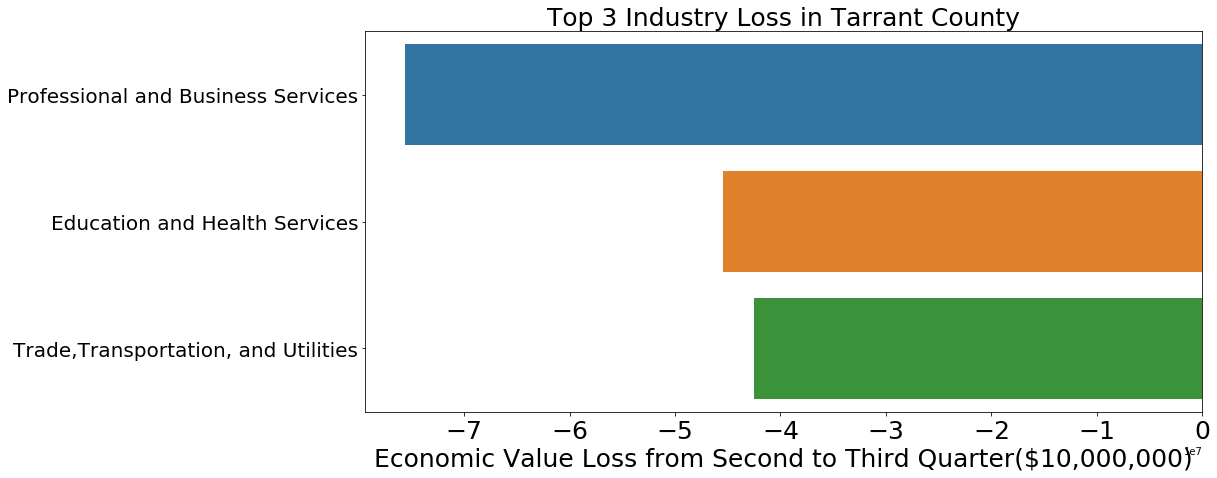

In [34]:
top3_industry_plot('Tarrant County')

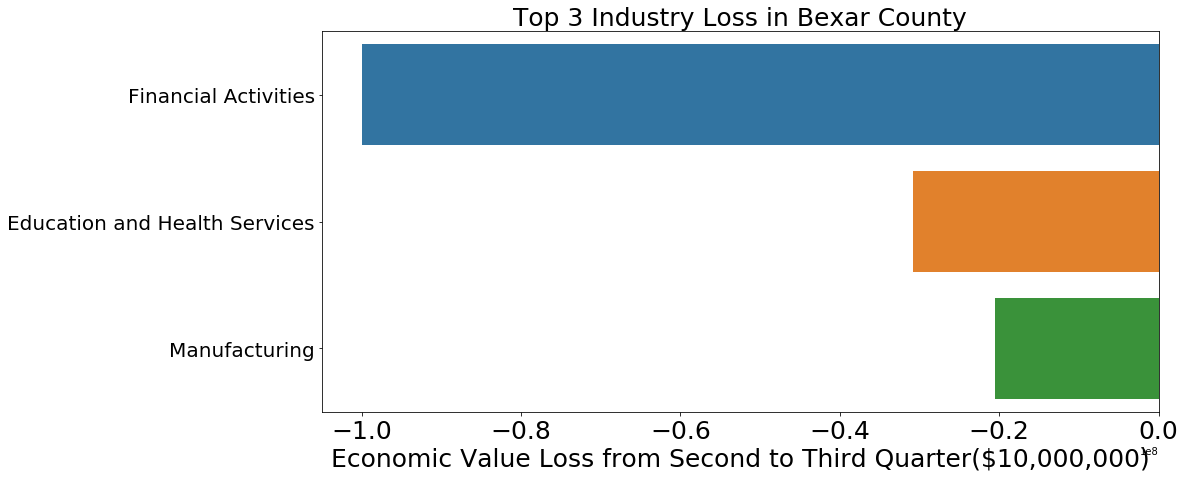

In [35]:
top3_industry_plot('Bexar County')

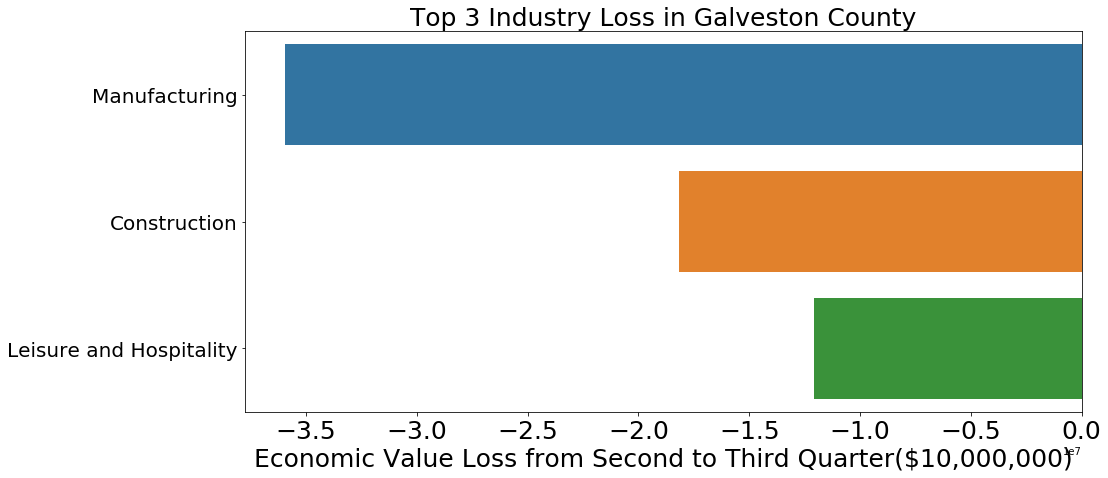

In [36]:
top3_industry_plot('Galveston County')

# Splitting Dataframes by Industry 

We also wanted to know what is the difference of the top 5 counties with the most economic value change from second to the third quarter and what is their top 3 industries.

In [37]:
df.Industry.unique()

array(['Leisure and Hospitality', 'Education and Health Services',
       'Professional and Business Services', 'Financial Activities',
       'Information', 'Trade,Transportation, and Utilities',
       'Manufacturing', 'Construction', 'Natural Resources and Mining',
       'Unclassified', 'Other Services'], dtype=object)

In [38]:
# create new dataframes by Industry
mask_cons = df.Industry == 'Construction'
df_cons = df[mask_cons]


In [39]:
df_cons.head()

,Area Name,Quarter,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),Industry,FIPS,Was it impacted?,Economic Value Quarterly
1734,Anderson County,Second Quarter,108.0,614.0,-11.8,869.0,26.1,Construction,48001.0,0,6936358.0
1735,Andrews County,Second Quarter,37.0,794.0,16.1,1429.0,11.0,Construction,48003.0,0,14750138.0
1736,Angelina County,Second Quarter,143.0,1443.0,2.9,763.0,-4.5,Construction,48005.0,0,14313117.0
1737,Aransas County,Second Quarter,62.0,364.0,7.1,936.0,1.5,Construction,48007.0,1,4429152.0
1738,Archer County,Second Quarter,40.0,132.0,7.3,676.0,12.7,Construction,48009.0,0,1160016.0


In [40]:
table_cons=pd.pivot_table(df_cons, values='Economic Value Quarterly', index=['Area Name'], columns=['Quarter'], aggfunc=np.sum)


In [41]:
# Add columns in table_cons to show the economic change during diff quarter.
table_cons['EV Change(Second to Third)'] = table_cons['Third Quarter'] - table_cons['Second Quarter']
table_cons['EV Change(Third to Fourth)'] = table_cons['Fourth Quarter'] - table_cons['Third Quarter']
table_cons.head(3)

Quarter,Fourth Quarter,Second Quarter,Third Quarter,EV Change(Second to Third),EV Change(Third to Fourth)
Area Name,,,,,
Anderson County,7409649.0,6936358.0,6992544.0,56186.0,417105.0
Andrews County,16809975.0,14750138.0,16562468.0,1812330.0,247507.0
Angelina County,15234232.0,14313117.0,14509560.0,196443.0,724672.0


In [42]:
# Add columns in table_cons to show the economic change during diff quarter.
table_cons['EV Change(Second to Third)'] = table_cons['Third Quarter'] - table_cons['Second Quarter']
table_cons['EV Change(Third to Fourth)'] = table_cons['Fourth Quarter'] - table_cons['Third Quarter']


# Create a column to indicate is the county impacted or not.
table_cons['Was it impacted?'] = table_cons.index.map(dict1)

table_cons.head(2)

Quarter,Fourth Quarter,Second Quarter,Third Quarter,EV Change(Second to Third),EV Change(Third to Fourth),Was it impacted?
Area Name,,,,,,
Anderson County,7409649.0,6936358.0,6992544.0,56186.0,417105.0,0
Andrews County,16809975.0,14750138.0,16562468.0,1812330.0,247507.0,0


In [43]:
mask5 = table_cons['EV Change(Second to Third)'].sort_values().head().index
mask5

Index(['Harris County', 'Fort Bend County', 'Galveston County',
       'Nueces County', 'Hutchinson County'],
      dtype='object', name='Area Name')

In [44]:
table_cons_t = table_cons.T
table_cons_t.head(2)

Area Name,Anderson County,Andrews County,Angelina County,Aransas County,Archer County,Armstrong County,Atascosa County,Austin County,Bailey County,Bandera County,...,Willacy County,Williamson County,Wilson County,Winkler County,Wise County,Wood County,Yoakum County,Young County,Zapata County,Zavala County
Quarter,,,,,,,,,,,,,,,,,,,,,
Fourth Quarter,7409649.0,16809975.0,15234232.0,4696263.0,1036490.0,772096.0,5092074.0,13862394.0,423072.0,2946957.0,...,393250.0,189095634.0,8327501.0,0.0,19756815.0,6323460.0,4828265.0,2417025.0,1640704.0,0.0
Second Quarter,6936358.0,14750138.0,14313117.0,4429152.0,1160016.0,620620.0,5349500.0,12134304.0,475800.0,3389607.0,...,402402.0,167890398.0,6937164.0,0.0,16593213.0,5743829.0,4536532.0,2066922.0,1731210.0,0.0


In [45]:
df_top5_cons = table_cons_t[mask5]
df_top5_cons.head(2)

Area Name,Harris County,Fort Bend County,Galveston County,Nueces County,Hutchinson County
Quarter,,,,,
Fourth Quarter,3.020909e+09,291999708.0,105489657.0,280209644.0,15465632.0
Second Quarter,2.742300e+09,263454880.0,106203825.0,265555212.0,25204608.0


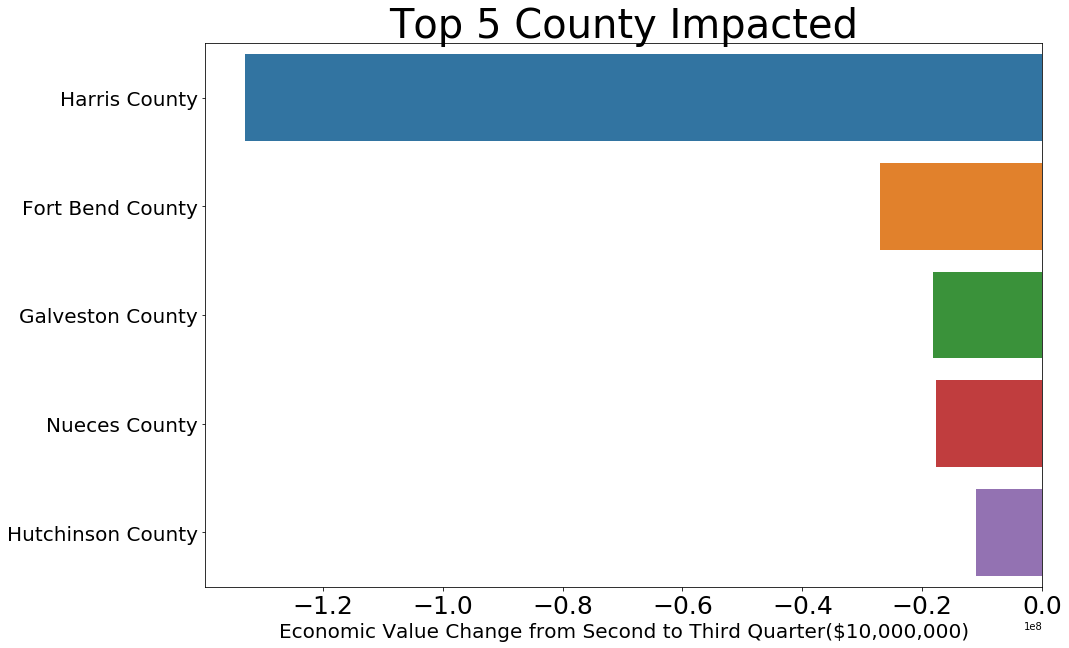

In [46]:
df_top5_cons = df_top5_cons.T

# Set the figsize
plt.figure(figsize = (15,10));

# plot the scatter plot
sns.barplot(x= 'EV Change(Second to Third)',
            y = df_top5_cons.index,
            data = df_top5_cons);

# Add the label of x and y
plt.xlabel('Economic Value Change from Second to Third Quarter($10,000,000)',
          fontsize = 20);
plt.ylabel('');
plt.title('Top 5 County Impacted',fontsize = 40);

# Adject the x & y label font size
plt.xticks(fontsize = 25);
plt.yticks(fontsize =20);

In [47]:
df_top5_cons.head()

Quarter,Fourth Quarter,Second Quarter,Third Quarter,EV Change(Second to Third),EV Change(Third to Fourth),Was it impacted?
Area Name,,,,,,
Harris County,3.020909e+09,2.742300e+09,2.609350e+09,-132950051.0,411558771.0,1.0
Fort Bend County,2.919997e+08,2.634549e+08,2.364716e+08,-26983255.0,55528083.0,1.0
Galveston County,1.054897e+08,1.062038e+08,8.804510e+07,-18158725.0,17444557.0,1.0
Nueces County,2.802096e+08,2.655552e+08,2.477610e+08,-17794257.0,32448689.0,1.0
Hutchinson County,1.546563e+07,2.520461e+07,1.423168e+07,-10972923.0,1233947.0,0.0


In [48]:
mask_Leisure_Hospitality = df.Industry == 'Leisure and Hospitality'
df_Leisure_Hospitality = df[mask_Leisure_Hospitality]

In [49]:
# Create a column of the total wage of county
df['Weekly Economic Value'] = df['Employment'] * df['Average Weekly Wages']

In [50]:
# Leisure and Hospitality
df_hosp = df_Leisure_Hospitality
df_hosp.head()

,Area Name,Quarter,No Of Establishments,Employment,One-Year Employment Gain/Loss (Percent),Average Weekly Wages,On-Year Weekly Wages Gain/Loss (Percent),Industry,FIPS,Was it impacted?,Economic Value Quarterly
0,Anderson County,Second Quarter,109.0,1666.0,3.1,275.0,1.1,Leisure and Hospitality,48001.0,0,5955950.0
1,Andrews County,Second Quarter,37.0,531.0,17.5,439.0,-0.9,Leisure and Hospitality,48003.0,0,3030417.0
2,Angelina County,Second Quarter,157.0,3549.0,7.6,302.0,-0.3,Leisure and Hospitality,48005.0,0,13933374.0
3,Aransas County,Second Quarter,124.0,1660.0,6.8,335.0,-0.9,Leisure and Hospitality,48007.0,1,7229300.0
4,Archer County,Second Quarter,8.0,60.0,50.0,222.0,-21.3,Leisure and Hospitality,48009.0,0,173160.0


In [51]:
table_hosp=pd.pivot_table(df_hosp, values='Economic Value Quarterly', index=['Area Name'], columns=['Quarter'], aggfunc=np.sum)
table_hosp.head()

Quarter,Fourth Quarter,Second Quarter,Third Quarter
Area Name,,,
Anderson County,5949216.0,5955950.0,5683392.0
Andrews County,3139006.0,3030417.0,2902354.0
Angelina County,14768000.0,13933374.0,14179776.0
Aransas County,4169906.0,7229300.0,3816462.0
Archer County,157235.0,173160.0,193492.0


In [52]:
# Add columns in table_hosp to show the economic change during diff quarter.
table_hosp['EV Change(Second to Third)'] = table_hosp['Third Quarter'] - table_hosp['Second Quarter']
table_hosp['EV Change(Third to Fourth)'] = table_hosp['Fourth Quarter'] - table_hosp['Third Quarter']


# Create a column to indicate is the county impacted or not.
table_hosp['Was it impacted?'] = table_hosp.index.map(dict1)

table_hosp.head(2)

Quarter,Fourth Quarter,Second Quarter,Third Quarter,EV Change(Second to Third),EV Change(Third to Fourth),Was it impacted?
Area Name,,,,,,
Anderson County,5949216.0,5955950.0,5683392.0,-272558.0,265824.0,0
Andrews County,3139006.0,3030417.0,2902354.0,-128063.0,236652.0,0


In [53]:
# convert the table column and row 
table_hosp_t = table_hosp.T
# take the county in top 5
df_top5_hosp = table_hosp_t[mask5]
df_top5_hosp.head(2)

Area Name,Harris County,Fort Bend County,Galveston County,Nueces County,Hutchinson County
Quarter,,,,,
Fourth Quarter,1.459666e+09,124972848.0,89890944.0,100389510.0,2394275.0
Second Quarter,1.389953e+09,119396550.0,96656950.0,106112565.0,2641392.0


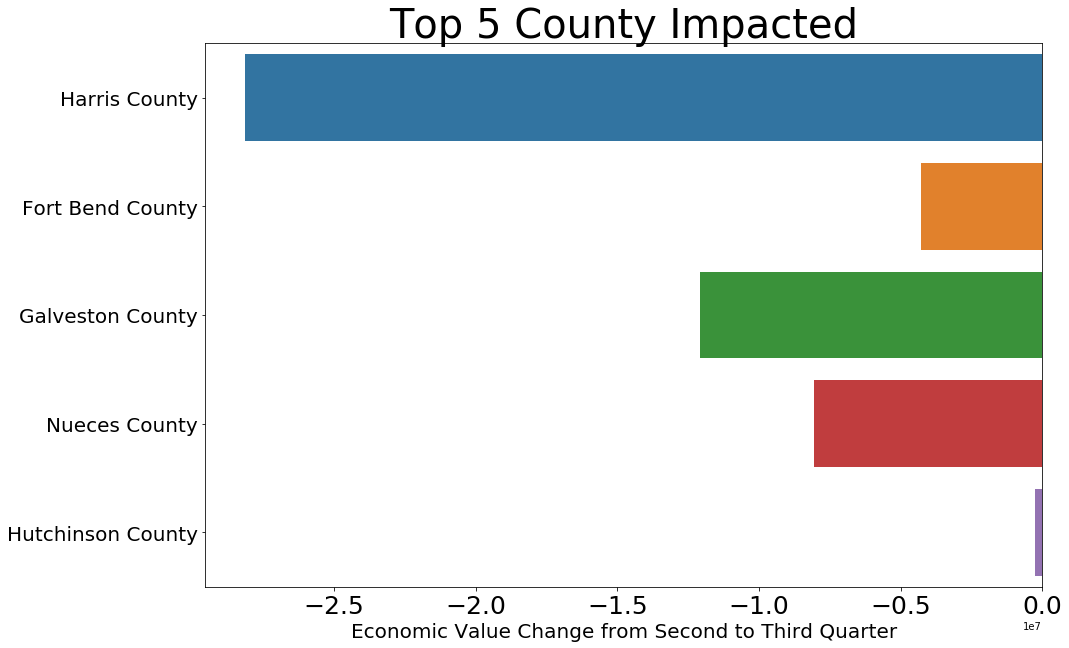

In [54]:
df_top5_hosp = df_top5_hosp.T

df_top5_hosp.head()

# Set the figsize
plt.figure(figsize = (15,10));

# plot the scatter plot
sns.barplot(x= 'EV Change(Second to Third)',
            y = df_top5_hosp.index,
            data = df_top5_hosp);

# Add the label of x and y
plt.xlabel('Economic Value Change from Second to Third Quarter',
          fontsize = 20);
plt.ylabel('');
plt.title('Top 5 County Impacted',fontsize = 40);

# Adject the x & y label font size
plt.xticks(fontsize = 25);
plt.yticks(fontsize =20);

In [55]:
#creating a mask for industry of education
mask_edu = df.Industry == 'Education and Health Services'
df_edu = df[mask_edu]

mask_prof = df.Industry == 'Professional and Business Services'
df_prof = df[mask_prof]

mask_fin = df.Industry == 'Financial Activities'
df_fin = df[mask_fin]


mask_info = df.Industry == 'Information'
df_info = df[mask_prof]

mask_man = df.Industry == 'Manufacturing'
df_man = df[mask_man]

mask_nat = df.Industry == 'Natural Resources and Mining'
df_nat = df[mask_nat]

mask_un = df.Industry == 'Unclassified'
df_un = df[mask_un]

mask_os = df.Industry == 'Other Services'
df_os = df[mask_un]

mask_trad = df.Industry == 'Trade, Transportation, and Utilities'
df_trad = df[mask_trad]

## Next Steps


This notebook has focused exclusively on the economic impact in the relationships between Industries and Counties. The next notebook, Wage Loss Quarter by Quarter, will delve into the impacts over time to industries and counties. 